In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Menginport Data
house = pd.read_csv ('train_house.csv')

In [3]:
# Menampilakan 5 baris pertama
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
print(house.isnull().sum()) # Menampilkan jumlah nilai nan

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [6]:
# Mengganti NaN dengan 0
house.fillna(0, inplace=True)

In [7]:
print(house.isnull().sum()) # Menampilkan jumlah nilai nan

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [8]:
house_numeric = house.select_dtypes(include=['int64', 'float64']) # Memisahkan data numerik

In [9]:
# Menampilkan beberapa baris pertama
print(house_numeric.head())

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0

In [10]:
house_categorical = house.select_dtypes(include=['object']) # Memisahkan data kategorikal

In [11]:
# Menampilkan beberapa baris pertama
print(house_categorical.head())

  MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave     0      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave     0      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave     0      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave     0      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave     0      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType Sal

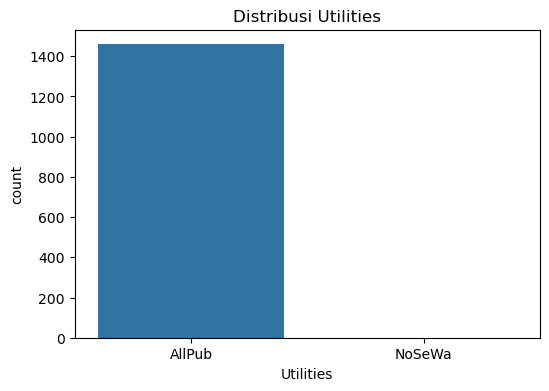

In [12]:
# Visualisasi distribusi Utilities (Fasilitas yang Tersedia)
plt.figure(figsize=(6, 4))
sns.countplot(x=house["Utilities"])
plt.title("Distribusi Utilities")
plt.show()

# Analisa Distribusi Utilities
- Hampir semua rumah memiliki kategori AllPub (semua layanan publik tersedia seperti listrik, air dan gas)
- Untuk kategori NoSeWa hampir tidak ada, menunjukan bahwa semua rumah pada dataset memiliki layanan yang lengkap.
- Dikarenakan hampir semua rumah memiliki Utilities AllPub, variabel ini kemungkinan tidka memiliki dampak signifikan terhadap harga rumah.

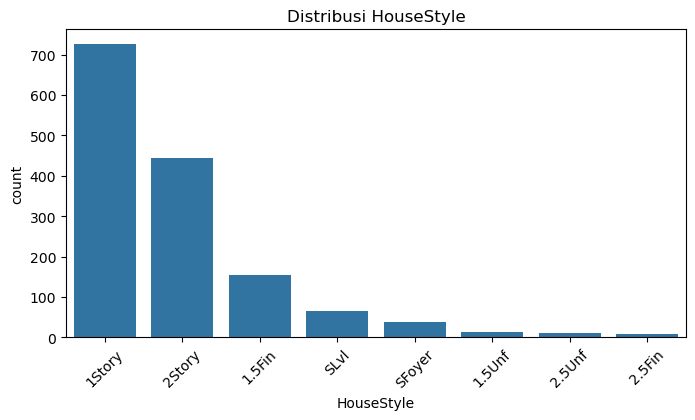

In [13]:
# Visualisasi distribusi HouseStyle (Gaya Rumah)
plt.figure(figsize=(8, 4))
sns.countplot(x=house["HouseStyle"], order=house["HouseStyle"].value_counts().index)
plt.title("Distribusi HouseStyle")
plt.xticks(rotation=45)
plt.show()

# Analisa Distribusi HouseStyle
- Untuk gaya rumah yang paling banyak adalah tipe 1Story (1 Lantai).
- Gaya 2Story juga cukup umum, tetapi lebih sedikit dibandingkan 1Story.

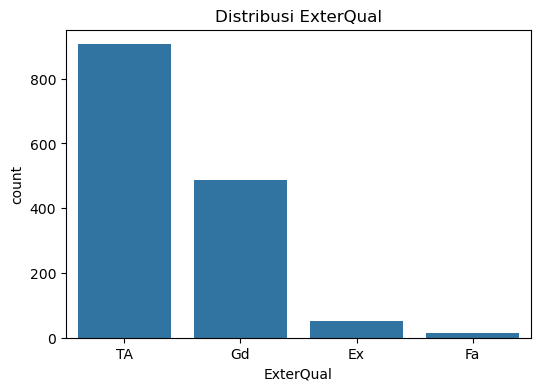

In [14]:
# Visualisasi distribusi ExterQual (Kuallitas Eksterior Rumah)
plt.figure(figsize=(6, 4))
sns.countplot(x=house["ExterQual"], order=house["ExterQual"].value_counts().index)
plt.title("Distribusi ExterQual")
plt.show()

# Analisa Distribusi ExterQual
- Rumah dengan kategori TA (Typical/Average) mendominasi dataset, menunjukan bahwa sebagian besar rumah memiliki kualitas eksterior yang standar.
- Sedangkan untuk kategori GD (Good) juga cukup umum, tetapi lebih sedikit dibandingkan TA
- Untuk kategori Ex (Excellent) dan Fa (Fair) lebih jarang ditemukan, sehingga menunjukan bahwa sangat sedikit rumah yang memiliki eksterior berkualitas sangat tinggi atau sangat rendah.


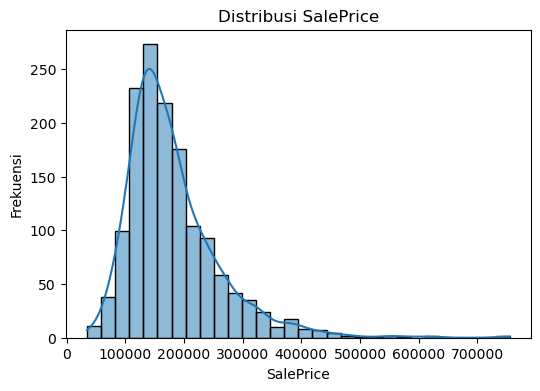

In [15]:
# Visualisasi histogram SalePrice
plt.figure(figsize=(6, 4))
sns.histplot(house["SalePrice"], bins=30, kde=True)
plt.title("Distribusi SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frekuensi")
plt.show()

# Analisa grafik diatas
- Grafik diatas menunjukan bahwa distribusi SalePrice (Harga Rumah) lebih condong ke kanan (right-skewed).
- Rata-rata rumah memiliki harga antara 100.000 hingga 250.000, dengan puncak distribusi di sekitar 150.000 - 200.000.
- Ada beberapa rumah dengan harga jauh lebih tinggi di atas 400.000 yang bisa dianggap outlier.

In [16]:
# Transformasi log pada SalePrice
house["SalePrice_log10"] = np.log10(house["SalePrice"])


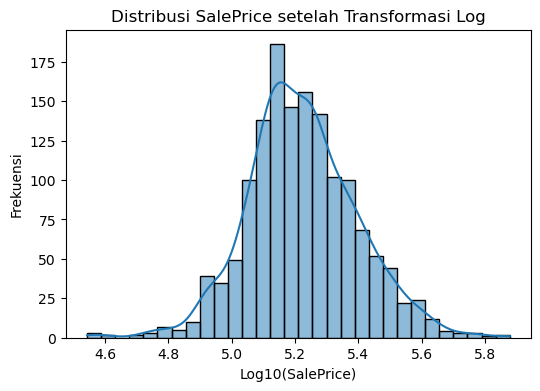

In [17]:
# Visualisasi histogram setelah transformasi log
plt.figure(figsize=(6, 4))
sns.histplot(house["SalePrice_log10"], bins=30, kde=True)
plt.title("Distribusi SalePrice setelah Transformasi Log")
plt.xlabel("Log10(SalePrice)")
plt.ylabel("Frekuensi")
plt.show()

# Analisa grafik diatas
- Distribusi GrLivArea juga condong ke kanan, artinya sebagian besar rumah memiliki luas lantai yang relatif kecil, sementara beberapa rumah memiliki luas yang sangat besar.
- Rata-rata rumah memiliki luas ruang tinggal (GrLivArea) sekitar 1000 - 2000 sqft.
- Beberapa rumah memiliki ukuran yang jauh lebih besar dibandingkan rumah lainnya.

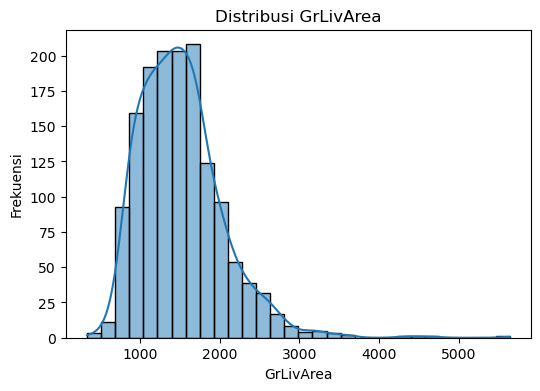

In [18]:
# Visualisasi histogram GrLivArea
plt.figure(figsize=(6, 4))
sns.histplot(house["GrLivArea"], bins=30, kde=True)
plt.title("Distribusi GrLivArea")
plt.xlabel("GrLivArea")
plt.ylabel("Frekuensi")
plt.show()

# Analisa grafik diatas
- Pada grafik diatas menunjukan distribusi GrLivArea right-skewed (condong ke kanan)
- Mayoritas rumah memiliki luas ruang tamu antara 1000-2000 sqft.
- Karena distribusi tidak normal dan condong ke kanan, perlu dilakukan transformasi log untuk menstabilkan distribusi grafik.

In [19]:
# Melakukan transformasi log pada variabel GrLivArea
house['GrLivArea_log10'] = np.log10(house['GrLivArea'])


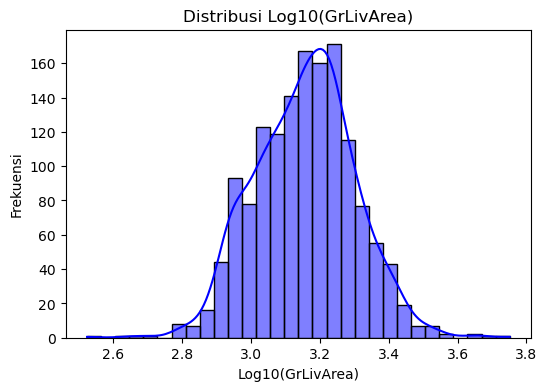

In [20]:
# Visualisasi distribusi setelah transformasi log
plt.figure(figsize=(6, 4))
sns.histplot(house['GrLivArea_log10'], bins=30, kde=Tue, color="blue")
plt.title('Distribusi Log10(GrLivArea)')
plt.xlabel('Log10(GrLivArea)')
plt.ylabel('Frekuensi')
plt.show()

# Analisa grafik diatas
- Setelah transformasi log, distribusi lebih terpusat di sekitar nilai tengah, mengurangi pengaruh outlier.
- Data sekarang lebih sesuai untuk analisis yang memerlukan asumsi normalitas, seperti regresi linear.

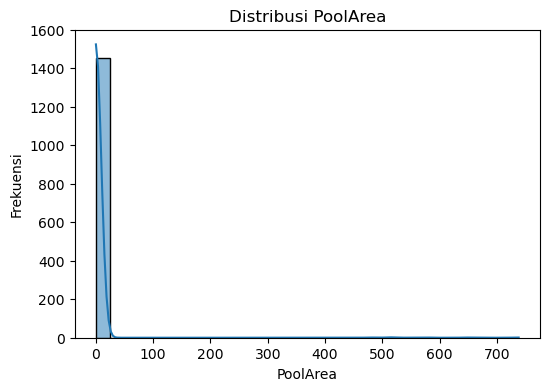

In [21]:
# Visualisasi histogram PoolArea
plt.figure(figsize=(6, 4))
sns.histplot(house["PoolArea"], bins=30, kde=True)
plt.title("Distribusi PoolArea")
plt.xlabel("PoolArea")
plt.ylabel("Frekuensi")
plt.show()

# Analisa grafik diatas
- Dari histogram di atas, terlihat bahwa variabel PoolArea memiliki distribusi yang sangat skewed ke kanan
- Sebagian besar data berada di angka 0, menunjukkan bahwa mayoritas rumah dalam dataset tidak memiliki kolam renang.
- Karena banyaknya nilai nol, transformasi log tidak efektif untuk normalisasi.

In [22]:
# Transformasi log-10 untuk PoolArea
house['Log10_PoolArea'] = np.log10(house['PoolArea'] + 1)


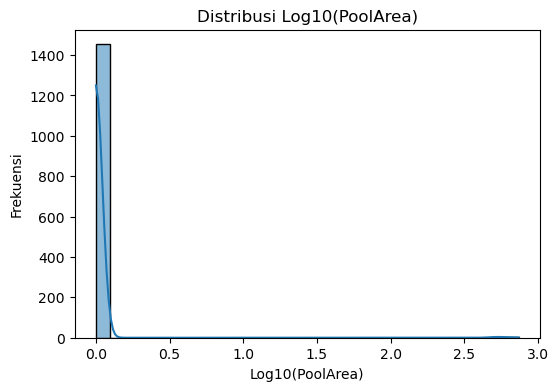

In [23]:
# Visualisasi
plt.figure(figsize=(6, 4))
sns.histplot(house['Log10_PoolArea'], bins=30, kde=True)
plt.title('Distribusi Log10(PoolArea)')
plt.xlabel('Log10(PoolArea)')
plt.ylabel('Frekuensi')
plt.show()

# Analisa grafik diatas
- Grafik menunjukkan mayoritas nilai berada di sekitar log10(PoolArea) = 0, yang berarti sebagian besar rumah tidak memiliki kolam renang atau memiliki luas sangat kecil.
- Hanya sedikit rumah dengan PoolArea yang lebih besar, sehingga distribusi tetap sangat skewed ke kanan meskipun telah dilakukan transformasi log.


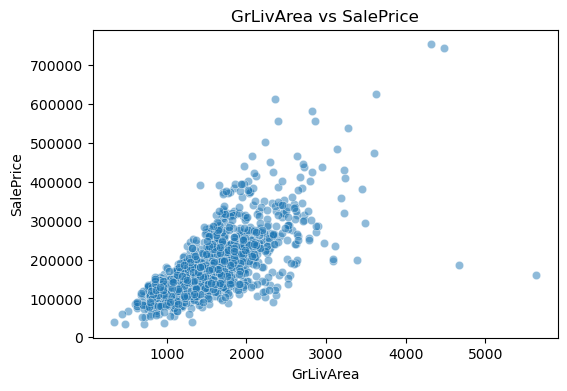

In [24]:
# Scatter plot GrLivArea vs SalePrice
plt.figure(figsize=(6, 4))
sns.scatterplot(x=house['GrLivArea'], y=house['SalePrice'], alpha=0.5)
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

# Analisa grafik diatas
- Pada pola diatas menunjukan adanya hubungan positif antara GrLivArea (luas ruang tamu) dan SalePrice (harga rumah)
- Setelah 2500 sqft, penyebaran data mulai lebih acak, menunjukan harga yang lebih besar.
- Sebagian besar data mengikuti pola linear, menunjukan bahwa GrLivArea adalah salah satu faktor penting dalam menentukan harga rumah

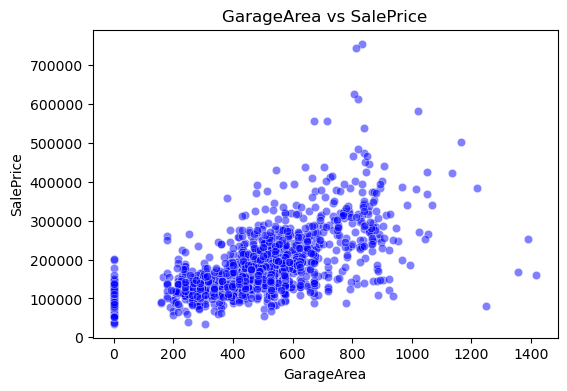

In [25]:
# Scatter plot GarageArea vs SalePrice
plt.figure(figsize=(6, 4))
sns.scatterplot(x=house['GarageArea'], y=house['SalePrice'], alpha=0.5, color='blue')
plt.title('GarageArea vs SalePrice')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

# Analisa grafik diatas
- Rata - rata rumah memiliki GarageArea antara 200 - 800 sqft, dengan harga rumah berkisar 100.000 - 400.000
- Pada pola scatter plot terlihat bahwa distribusi data berkolerasi positif antara GarageArea (luas garasi) dan SalePrice (harga rumah)
- Hubungan antara GarageArea dan SalePrice tidak sekuat hubungan antara GrLivArea dan SalePrice karena adanya penyebaran yang cukup lebar.